# Assignment 2 Part 1

## Task 1 (70 marks)

###  In this part of assignment you'll be implementing camera matrices and calculating homography between them. The cameras are looking at an arbitrary plane or arbitrarily rotation at a fixed position (you can look at slides 30 & 33 of lecture 9). For this task you can reference slides for camera models (lecture 8 & 9)

In [1]:
import cmath
import random
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (20)
### Write a function to generate a set of 100 points on a randomly-oriented 3D plane (alinged along a circle with radius r) or on sphere with radius r (you can choose the radius yourself). Show that your generated points are indeed on a plane or on a sphere  (using show_points) .
### Equation of a plane: Ax+By+Cz+D = 0
### TODO: Make a function gen_points to generate the points and then a function show_points to visualize these (in 3D) (You are free to modify these functions anyway you like)

/home/umar/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/umar/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:735: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


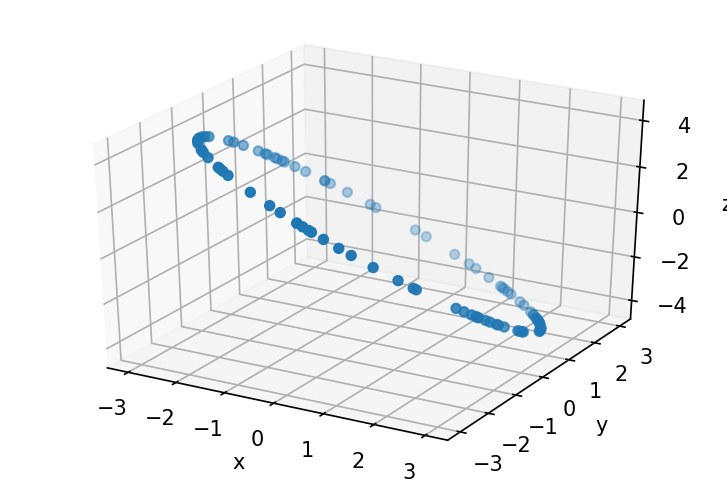

In [2]:
def gen_points(A,B,C,D,r):
    X = []
    Y = []
    Z = []
    Fourth = []
    
    for x in range(100):
        Fourth.append(1)
        angle = np.radians(random.randint(0,360))
        x = r*np.cos(angle)
        y = r*np.sin(angle)
        z = (-D - (B*y) - (A*x))/C
        X.append(x)
        Y.append(y)
        Z.append(z)
    T = np.array([X, Y, Z, Fourth])
    return T
def show_points(points):

    fig = figure(dpi = 150)
    ax = plt.axes(projection='3d')
    ax.scatter3D(points[0],
             points[1],
             points[2],
             points[3],
             cmap = "gray")

    ax.set(xlabel='x', ylabel='y', zlabel='z')
    return

pts = gen_points(1,1,1,0,3)
show_points(pts)

## Part 2 (5)
### Write a function to setup a camera matrix. You can pass in rotation and transalation as a parameter but for default case they should be set up arbitrarily.
### Camera Matrix (for projective camera) : K * R * T (Where K is intrinsic parameters, R is rotation and T is translation)
### TODO: Write gen_camera_matrix. (You are free to modify these functions anyway you like)

In [3]:
def gen_camera_matrix(mxf, myf, px, py, R, T):
    
    K = np.array([[mxf,0,px,0],[0,myf,py,0],[0,0,1,0]])
    
    R = np.asarray(R)
    T = np.asarray(T)
    TxR = np.matmul(R,T)
    Camera = np.matmul(K,TxR)
    return Camera # 3x4

In [4]:
def normalization(value):
    hx = value[:,0]
    hy = value[:,1]
    h = value[:,2]

    x = hx/h
    y = hy/h
    grid = np.ones(x.shape)

    return np.concatenate([x.reshape(-1,1), y.reshape(-1,1), grid.reshape(-1,1)],axis = 1).T

## Part 3 (5)
### Write a function to compute the image coordinates of a list of 3D points on a plane.  
### Camera Matrix (for projective camera) : K * R * T (Where K is intrinsic parameters, R is rotation and T is translation)
### Image Coordinates: C * points (where C is the camera matrix)
### TODO: Write compute_camera_coordinates. (You are free to modify these functions anyway you like)

In [5]:
def compute_camera_coordinates(P3x4,World_pts):
#     World_pts is in 4x1
#     P3x4 is in 3x4
    World_pts = np.asarray(World_pts)
    B4_normalization = np.matmul(P3x4,World_pts).T
    
    Img_pts = normalization(B4_normalization)
    return Img_pts # 3x1 as an np array

## Part 4 (30)
### Write a function to compute the homography between two sets of images points.
### Your homography function should be able to select between two cases. 
### 1. Points are taken by two different cameras with arbitrary translation and rotation between the cameras. Both sets are basically the images of same points in 3D (lying on the same plane5
### 2. Points are taken by same camera with arbitrary rotation in the two images.
### TODO: Write compute_homography. (You are free to modify these functions anyway you like)

In [6]:
def compute_homography(Gen_pts, Gen_pts2): 
#     Img Pts is 3x1 whereas Gen_pts is 4x100, P is 200x9
    P = np.zeros((2*(Gen_pts.shape[1]),9))
    rows = 0
    for i in range(100):
        x = Gen_pts[0][i]
        y = Gen_pts[1][i]
        
        xp = Gen_pts2[0][i]
        yp = Gen_pts2[1][i]
        
        P[rows] = np.array([-x,-y,-1,0,0,0,x*xp,y*xp,xp])
        rows+=1
        P[rows] = np.array([0,0,0,-x,-y,-1,x*yp,y*yp,yp])

        rows+=1
    U, S, V = np.linalg.svd(P, full_matrices = True)
    End_col = V[V.shape[0]-1,:]
    
    new_P = End_col.reshape((3,3))
        
    
    return new_P

# In case 2 we will send the camera matrix 3 by 4 with K and R only, no translation matrix,
# Thus we will have the exact same implementation for compute homography in this part.
# Since only says to modify in this part and no modification is required thus I have not done any modification
# as this works for both cases.

## Part 5 (10)
### Write a function to compute the error between two set of points after homography is applied.
### TODO: Write error_func. (You are free to modify these functions anyway you like)

In [7]:
def error_func(pt1,pt2):
    error_x = (pt1[0]-pt2[0])**2
    error_y = (pt1[1]-pt2[1])**2
    err = np.sum(error_x + error_y)
    return err

## Task 2 (30 marks)
### Using what you have already written in task 1, test your results. Take two sets of points using the function in part 3 (while keeping the cases in part 4 in view). Plot one set of points and then using homography between the sets of points, map the other set onto the same image (you can use different colors to differentiate) and see if they are close enough. You have the use the functions from part 1 to achieve this.
### TODO: Use functions from task 1 and give a proper representation of homography calculation

In [8]:
## A few pointers. Read the slides carefully
## When generating points in task 1, you can use the seed in np.random
## Modify the functions anyway you like
## In order get full points, you have to show both cases otherwise you'll be getting partial credit for the parts the you have solved
## In part 2, to keep things simple define certain parameters like focal length
## Don't go crazy with radius. If your radius is too big there is chance that your error will come out to be large too.
## Solve both tasks in parallel. Make the functions and test them as an implementation of task 2.

pts_gen = gen_points(2,2,2,2,5)

mx = 2
my = 2
f = 2
px = 1
py = 1

R=np.array([[np.cos(0.5),-np.sin(0.5),0,0],
            [np.sin(0.5),np.cos(0.5),0,0],
            [0,0,1,0],
            [0,0,0,1]])

T=np.array([[1,0,0,10],[0,1,0,11],[0,0,1,12],[0,0,0,1]])


camera1 = gen_camera_matrix(mx*f, my*f, px, py, R, T) # 3X4
camera2 = gen_camera_matrix(mx*f, my*f, px, py, R, T)


one = compute_camera_coordinates(camera1,pts_gen) # 3X1
two = compute_camera_coordinates(camera2,pts_gen)

Homo = compute_homography(one, two)

First = np.matmul(Homo, two)

First = normalization(First.T)

print (error_func(First, two))


5.0581268204705514e-27


## Extra Credit (For both undergrad and grad) (15 marks)
### Suggest a few modifications to this algorithm or propose a better algorithm for computing homography. You are free to read and cite any of the other existing methods to compute homography. To get any credit in this part you have to draw comparisons between the given solution and your proposed solution.

### You will only get extra credit if you have done at least 80% of the assignment 

### Write your answer here.